In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier


In [2]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [5]:
!pip install mlxtend


     ---------------------------------------- 1.4/1.4 MB 3.1 MB/s eta 0:00:00


In [3]:
data=pd.read_csv("data/final_features.csv")

In [14]:
data.head()

,freq_qid1,freq_qid2,q1_len,q2_len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,1,1,66,57,14,12,10.0,23.0,0.434783,2,...,12.478954,-30.068915,-47.913707,14.714811,-17.241791,6.486735,26.456941,63.701761,-17.887825,21.516744
1,4,1,51,88,8,13,4.0,20.0,0.200000,5,...,4.830299,19.611342,-35.900325,45.733032,-2.857659,5.916804,82.456646,34.427442,-0.153906,83.436959
2,1,1,73,59,14,10,4.0,24.0,0.166667,2,...,51.079299,-11.944445,-51.070310,12.397111,-19.068659,-5.625129,48.529716,48.813838,-6.016333,10.582172
3,1,1,50,65,11,9,0.0,19.0,0.000000,2,...,22.016934,8.856643,-6.845009,22.816601,0.418034,-18.978339,9.303711,41.359689,4.616394,32.863481
4,3,1,76,39,13,7,2.0,20.0,0.100000,4,...,-3.956318,-13.591868,-26.024702,13.573341,-10.809346,-2.419427,35.918892,36.435138,-10.428509,16.641590


In [11]:
y=data['is_duplicate']
data.drop(['Unnamed: 0', 'id','is_duplicate'],axis=1,inplace=True)

In [13]:
data.drop(['qid1','qid2'],axis=1,inplace=True)

In [12]:
# we convert all the features into numaric before we apply any model
cols = list(sampled_data.columns)
for i in cols:
    data[i] = data[i].apply(pd.to_numeric)
    print(i)

freq_qid1
freq_qid2
q1_len
q2_len
q1_n_words
q2_n_words
word_Common
word_Total
word_share 
freq_q1+q2
freq_q1-q2
cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
0_y
1_y
2_y
3_y
4_y
5_y
6_y
7_y
8_y
9_y
10_y
11_y
12_y
13_y
14_y
15_y
16_y
17_y
18_y
19_y
20_y
21_y
22_y
23_y
24_y
25_y
26_y
27_y
28_y
29_y
30_y
31_y
32_y
33_y
34_y
35_y
36_y
37_y
38_y
39_y
40_y
41_y
42_y
43_y
44_y
45_y
46_y
47_y
48_y
4

In [16]:
y = list(map(int, y.values))

In [17]:
data["is_duplicate"]=y

In [18]:
data.head()

,freq_qid1,freq_qid2,q1_len,q2_len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,...,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y,is_duplicate
0,1,1,66,57,14,12,10.0,23.0,0.434783,2,...,-30.068915,-47.913707,14.714811,-17.241791,6.486735,26.456941,63.701761,-17.887825,21.516744,0
1,4,1,51,88,8,13,4.0,20.0,0.200000,5,...,19.611342,-35.900325,45.733032,-2.857659,5.916804,82.456646,34.427442,-0.153906,83.436959,0
2,1,1,73,59,14,10,4.0,24.0,0.166667,2,...,-11.944445,-51.070310,12.397111,-19.068659,-5.625129,48.529716,48.813838,-6.016333,10.582172,0
3,1,1,50,65,11,9,0.0,19.0,0.000000,2,...,8.856643,-6.845009,22.816601,0.418034,-18.978339,9.303711,41.359689,4.616394,32.863481,0
4,3,1,76,39,13,7,2.0,20.0,0.100000,4,...,-13.591868,-26.024702,13.573341,-10.809346,-2.419427,35.918892,36.435138,-10.428509,16.641590,0


In [5]:
sampled_data=data.sample(n=200001,random_state=42)

In [6]:
sampled_output = sampled_data['is_duplicate']

In [7]:
sampled_data.drop(["is_duplicate"],axis=1,inplace=True)

In [9]:
sampled_data.drop(['Unnamed: 0', 'id','qid1','qid2'],axis=1,inplace=True)

In [10]:
sampled_data

,freq_qid1,freq_qid2,q1_len,q2_len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
8067,2,2,34,34,8,8,7.0,16.0,0.437500,4,...,3.598148,-17.980896,-30.285867,35.331395,-4.752425,-16.860090,55.264818,9.754053,13.478356,34.965063
368101,5,2,53,51,11,9,6.0,20.0,0.300000,7,...,2.329130,-12.835633,-28.551114,17.817876,20.994309,26.343112,53.994841,30.936262,-6.380511,10.922333
70497,1,1,96,45,16,8,2.0,24.0,0.083333,2,...,0.606139,-18.104185,-19.720482,17.673098,7.044985,11.674716,61.573805,18.457264,-5.287064,13.388962
226567,2,2,44,52,7,9,4.0,16.0,0.250000,4,...,6.664569,9.677029,-4.019910,5.959144,-0.302579,6.030169,33.129992,18.046155,-14.255363,14.526357
73186,4,31,38,29,9,7,3.0,16.0,0.187500,35,...,-6.535949,-0.196452,-23.505541,20.808033,21.711279,-11.968925,54.723322,5.843198,-2.875695,29.943882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335199,17,14,41,33,10,8,6.0,17.0,0.352941,31,...,-5.165495,-7.176479,-17.046247,9.268151,-1.681221,5.642406,10.337910,21.853350,-3.739555,12.143948
381604,2,5,57,38,11,7,4.0,17.0,0.235294,7,...,-10.845631,-7.505183,-8.514174,-3.936149,-18.340093,15.769400,36.772182,22.530094,-12.489164,8.236939
243498,1,2,58,57,9,10,6.0,17.0,0.352941,3,...,-9.749886,-2.158481,-16.107064,18.534865,-22.936610,-4.470207,-11.763388,14.832345,-9.047665,4.321626
198406,1,1,59,47,13,11,3.0,23.0,0.130435,2,...,14.742448,-23.657673,-31.582710,24.309070,-21.286319,6.122522,36.138504,44.004486,3.360199,37.084225


## Split data

In [13]:
X_train,X_test,y_train,y_test=train_test_split(sampled_data,sampled_output,test_size=0.3)

In [14]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (140000, 218)
Number of data points in test data : (60001, 218)


In [15]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6291714285714286 Class 1:  0.37082857142857145
---------- Distribution of output variable in train data ----------
Class 0:  0.36931051149147515 Class 1:  0.36931051149147515


In [16]:
def plot_confusion_metrix(y_pred,y_test):
    C=confusion_matrix(y_test,y_pred)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    A=  (((C.T)/(C.sum(axis=1))).T)
    
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    B=(C/C.sum(axis=0))
    
    plt.figure(figsize=(20,4))
    
    cmap=sns.light_palette("orange")
    plt.subplot(1,3,1)
    sns.heatmap(C,annot=True,cmap=cmap,fmt=".3f")
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f")
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f")
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Log loss on Test Data using Random Model 0.8864125141107057


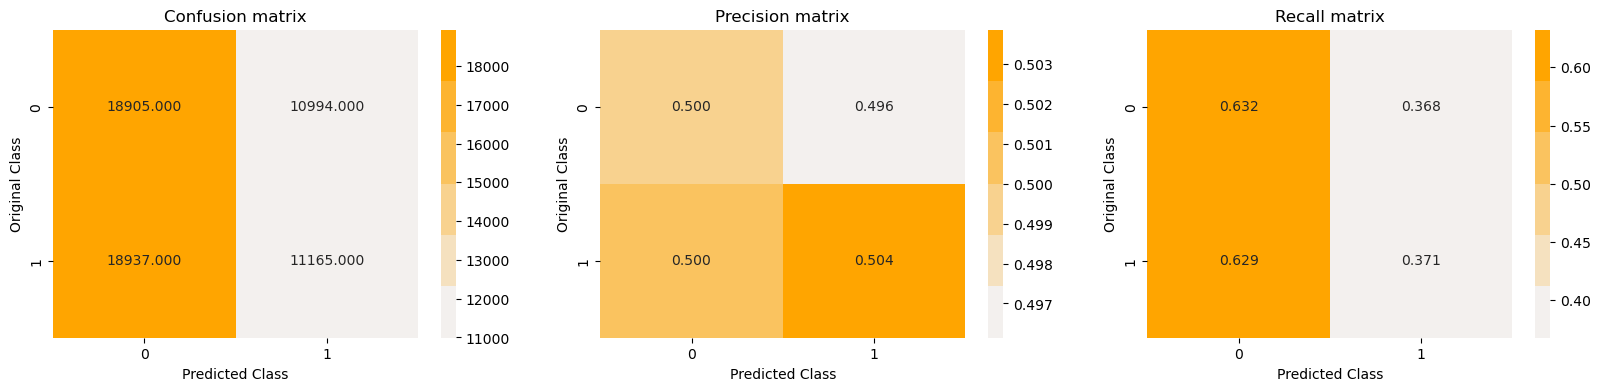

In [17]:
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_metrix(y_test, predicted_y)

For values of alpha =  1e-05 The log loss is: 0.4468785076406371
For values of alpha =  0.0001 The log loss is: 0.4558998846237717
For values of alpha =  0.001 The log loss is: 0.45823602281149856
For values of alpha =  0.01 The log loss is: 0.4298760113193789
For values of alpha =  0.1 The log loss is: 0.43093590269372806
For values of alpha =  1 The log loss is: 0.46744753249157855
For values of alpha =  10 The log loss is: 0.5136325609510957


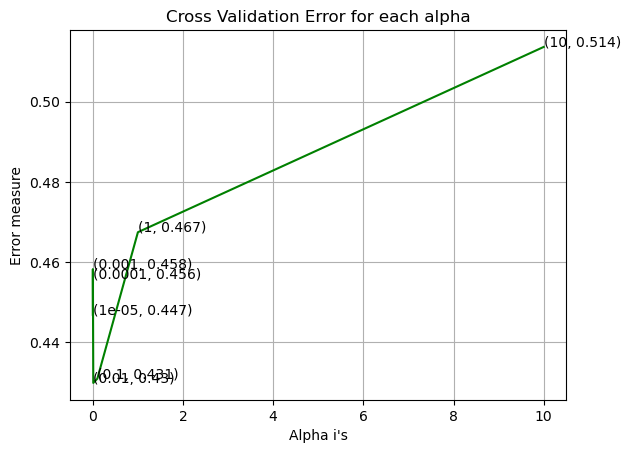

For values of best alpha =  0.01 The train log loss is: 0.43110528193100944
For values of best alpha =  0.01 The test log loss is: 0.4298760113193789
Total number of data points : 60001


NameError: name 'plot_confusion_matrix' is not defined

In [18]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.
log_error_array=[]

for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_metrix(y_test, predicted_y)

For values of best alpha =  0.01 The train log loss is: 0.43110528193100944
For values of best alpha =  0.01 The test log loss is: 0.4298760113193789
Total number of data points : 60001


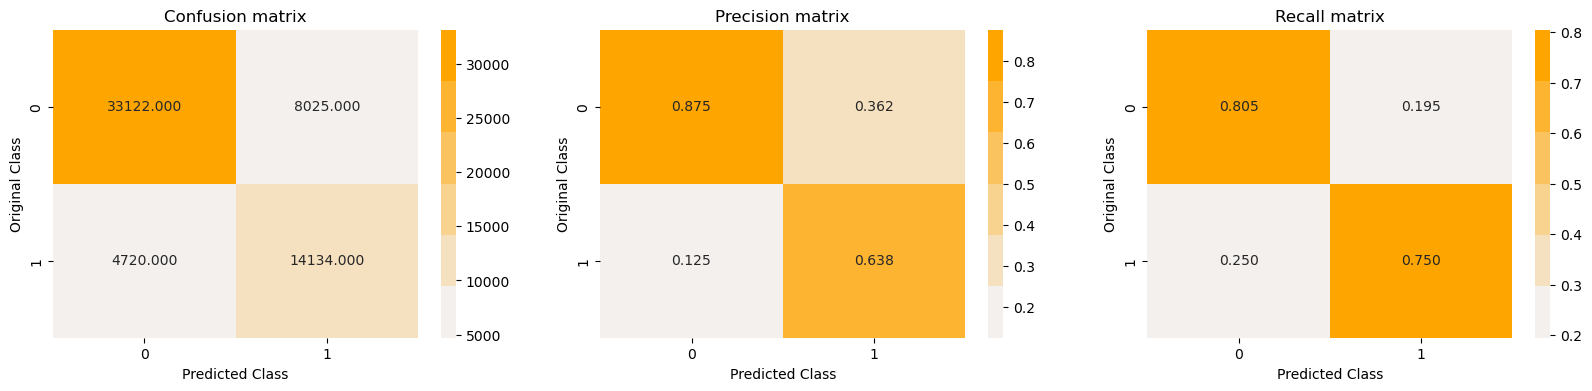

In [19]:
best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_metrix(y_test, predicted_y)

In [20]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.68485	valid-logloss:0.68483
[10]	train-logloss:0.61508	valid-logloss:0.61478
[20]	train-logloss:0.56313	valid-logloss:0.56234
[30]	train-logloss:0.52482	valid-logloss:0.52381
[40]	train-logloss:0.49517	valid-logloss:0.49396
[50]	train-logloss:0.47208	valid-logloss:0.47072
[60]	train-logloss:0.45347	valid-logloss:0.45199
[70]	train-logloss:0.43877	valid-logloss:0.43721
[80]	train-logloss:0.42693	valid-logloss:0.42534
[90]	train-logloss:0.41726	valid-logloss:0.41565
[100]	train-logloss:0.40927	valid-logloss:0.40763
[110]	train-logloss:0.40271	valid-logloss:0.40106
[120]	train-logloss:0.39724	valid-logloss:0.39566
[130]	train-logloss:0.39269	valid-logloss:0.39116
[140]	train-logloss:0.38873	valid-logloss:0.38728
[150]	train-logloss:0.38535	valid-logloss:0.38398
[160]	train-logloss:0.38257	valid-logloss:0.38128
[170]	train-logloss:0.37988	valid-logloss:0.37864
[180]	train-logloss:0.37768	valid-logloss:0.37654
[190]	train-logloss:0.37569	valid-logloss:0.37459
[200]	train

Total number of data points : 60001


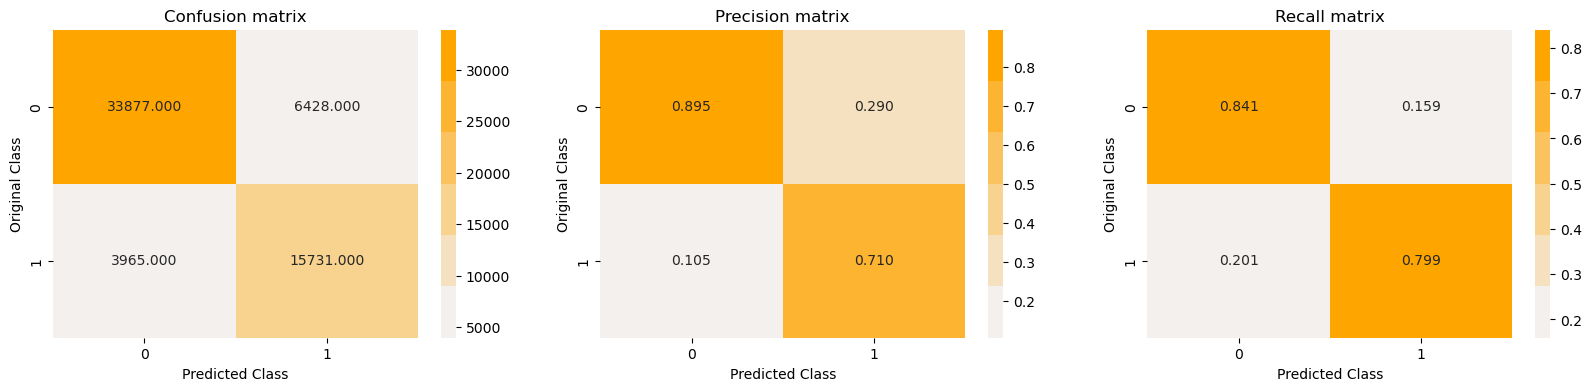

In [21]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_metrix(y_test, predicted_y)

In [23]:
print(d_train)

In [24]:
predict_x = bst.predict(d_train)

In [27]:
len(predict_x)

140000

In [29]:
X_train["xgboost_pred"]=predict_x

In [34]:
len(predicted_y)

60001

In [35]:
X_test["xgboost_pred"]=predicted_y

In [36]:
X_test

,freq_qid1,freq_qid2,q1_len,q2_len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,...,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y,xgboost_pred
266056,1,1,47,50,10,7,0.0,17.0,0.000000,2,...,15.639471,-11.938095,-8.685769,-22.792890,19.491692,51.292800,43.266326,-33.350594,15.522244,0
14982,1,1,148,81,27,16,7.0,36.0,0.194444,2,...,10.203322,-32.088688,2.499767,-22.824820,19.690321,69.608523,39.484765,-13.774702,32.797722,0
218072,2,1,35,58,6,11,2.0,17.0,0.117647,3,...,34.103337,-13.041382,20.161299,-14.460908,-17.214731,17.535516,26.447676,-13.411540,-4.251294,0
194090,1,1,34,57,7,8,0.0,15.0,0.000000,2,...,-9.759400,-28.822185,37.767364,-3.142123,15.248765,41.802207,30.677203,-18.848952,14.921812,0
296382,2,1,46,88,8,16,1.0,24.0,0.041667,3,...,-5.024267,-8.303601,36.133404,13.713617,-24.913010,50.394711,18.020655,-13.553304,23.810159,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99877,1,1,33,108,7,21,2.0,28.0,0.071429,2,...,31.572519,-32.758032,28.110786,-2.052130,-18.616120,64.009541,57.063985,-8.067011,18.935054,0
259692,5,5,47,24,9,6,5.0,15.0,0.333333,10,...,-6.195071,-7.712530,15.961067,0.979624,-0.821653,14.662786,11.377257,-2.128182,12.034010,1
274906,2,1,131,52,17,9,3.0,26.0,0.115385,3,...,-17.378328,-43.231405,36.106226,-0.224206,8.875565,64.533594,19.635038,-21.418326,18.250951,0
298814,1,1,72,76,12,11,2.0,22.0,0.090909,2,...,-23.432396,-44.167466,20.839234,-6.083309,13.243269,54.430095,51.613615,-30.948283,5.919098,0


In [30]:
X_train

,freq_qid1,freq_qid2,q1_len,q2_len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,...,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y,xgboost_pred
266447,1,1,49,37,7,7,0.0,14.0,0.000000,2,...,-4.720940,2.991789,11.211116,16.661577,9.128756,11.970077,19.623301,5.844614,2.185536,0.004367
318144,2,1,42,43,6,7,5.0,13.0,0.384615,3,...,26.156196,-17.232518,-17.350288,-18.360513,1.413301,55.950034,43.562510,13.319762,15.978119,0.291171
380789,2,1,43,75,10,16,6.0,26.0,0.230769,3,...,9.507201,-19.367228,56.990768,5.599971,-36.439606,45.169090,69.622262,9.863640,17.015073,0.320726
337331,1,2,52,52,10,10,9.0,20.0,0.450000,3,...,-7.809911,-16.484687,26.477529,-15.007694,-0.475044,45.983714,17.787042,-1.751972,32.633657,0.819508
13845,2,1,39,35,9,8,1.0,17.0,0.058824,3,...,0.413212,-18.484076,29.265754,-7.377112,-15.129407,41.025911,17.877441,6.125902,24.171843,0.006939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165732,1,1,45,194,8,33,4.0,37.0,0.108108,2,...,46.380917,-62.251419,95.346720,-13.564827,-3.052637,283.647024,124.974190,41.990756,130.074581,0.003662
357801,13,10,26,28,6,6,5.0,12.0,0.416667,23,...,-9.328673,-12.720361,15.700179,3.221779,-0.657466,21.444244,24.563550,-5.581149,11.334530,0.973541
49538,1,1,59,55,12,11,9.0,23.0,0.391304,2,...,-8.365015,0.751513,-2.760238,4.278930,-17.096923,13.322544,5.395672,-17.173444,33.039371,0.790151
321731,1,1,50,50,11,12,4.0,22.0,0.181818,2,...,-1.991398,-6.183831,6.804483,-6.489850,-4.847642,18.253137,17.591156,6.791688,59.759507,0.415964


In [31]:
best_alpha

3

For values of best alpha =  0.01 The train log loss is: 0.41163172203230247
For values of best alpha =  0.01 The test log loss is: 0.41073502473356704
Total number of data points : 60001


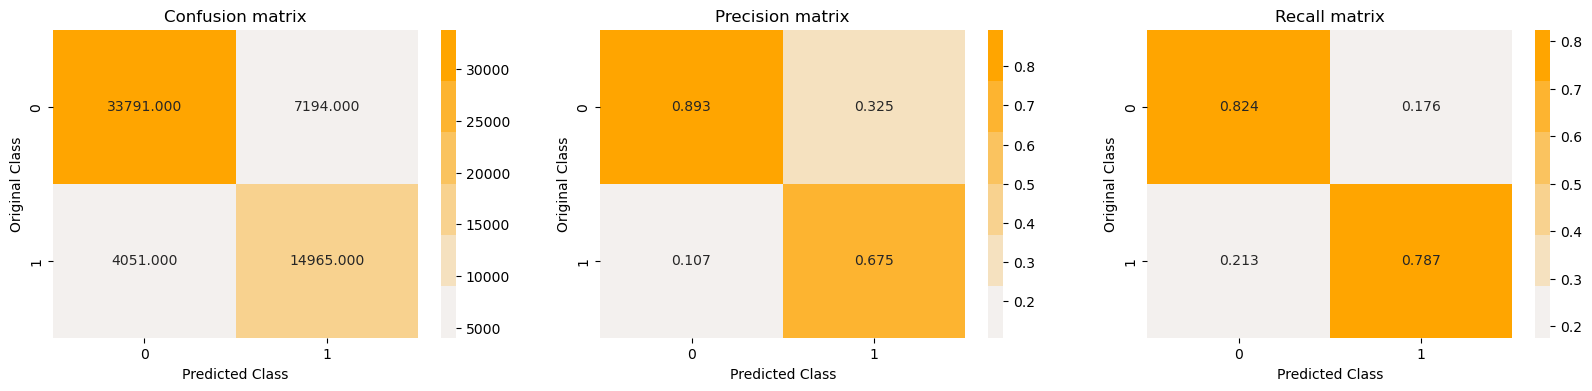

In [37]:
best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_metrix(y_test, predicted_y)